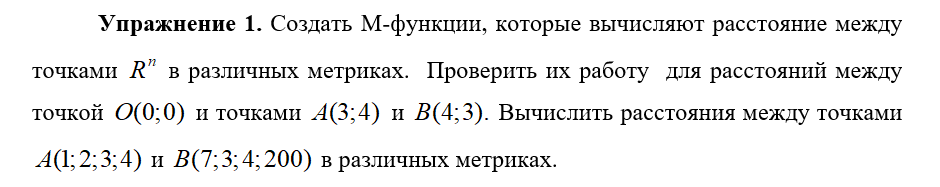

In [2]:
import numpy as np

def M0(x,y,n):
    mmax=0
    for k in range(1,n+1):
        if (abs(x[k-1]-y[k-1])>mmax):
            mmax= abs(x[k-1]-y[k-1])
    return (mmax)                 
def M1(x,y,n):
    sum=0
    for k in range(1,n+1):
        sum+=abs(x[k-1]-y[k-1])
    return sum
def M2(x,y,n):
    sum=0
    for k in range(1,n+1):
        sum+=(x[k-1]-y[k-1])**2
    return np.sqrt(sum)

In [2]:
A=[3,4]
O=[0,0]
B=[4,3]

print(M0(A,O,2))
print(M1(A,O,2))
print(M2(A,O,2))

print(M0(B,O,2))
print(M1(B,O,2))
print(M2(B,O,2))

4
7
5.0
4
7
5.0


In [3]:
A=[1,2,3,4]
B=[7,3,4,200]
print(M0(A,B,4))
print(M1(A,B,4))
print(round(M2(A,B,4)))

196
204
196


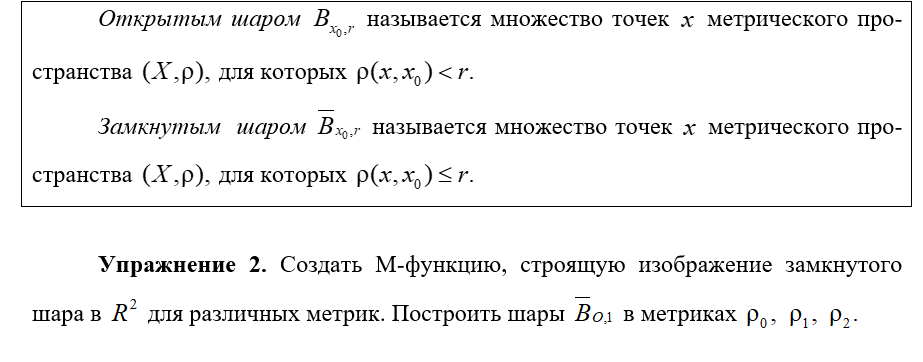

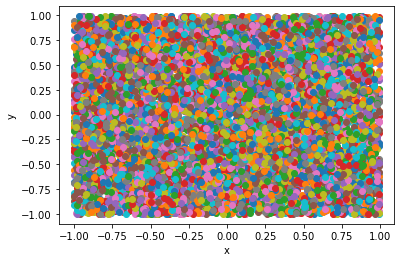

In [4]:
import matplotlib.pyplot as plt
import random
import numpy as np
def Ball0(x0,r,n):
    X=np.arange(-r,r,0.01)
    Y=np.arange(-r,r,0.01)
    for i in range(10000):
        X1=[random.choice(X),random.choice(Y)]
        if M0(x0,X1,n)<=r:
            x=X1[0]
            y=X1[1]
            plt.plot(x,y,"o")
            plt.xlabel('x')
            plt.ylabel('y')
            plt.grid()
x0=[0,0]                
Ball0(x0,1,2)

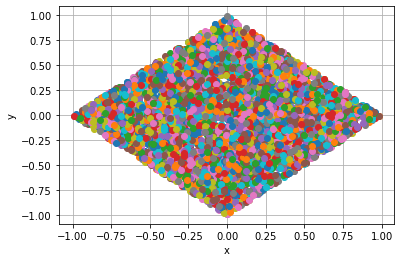

In [5]:
import matplotlib.pyplot as plt
import random
import numpy as np
def Ball1(x0,r,n):
    X=np.arange(-r,r,0.01)
    Y=np.arange(-r,r,0.01)
    for i in range(10000):
        X1=[random.choice(X),random.choice(Y)]
        if M1(x0,X1,n)<=r:
            x=X1[0]
            y=X1[1]
            plt.plot(x,y,"o")
            plt.xlabel('x')
            plt.ylabel('y')
            plt.grid()
x0=[0,0]                
Ball1(x0,1,2)

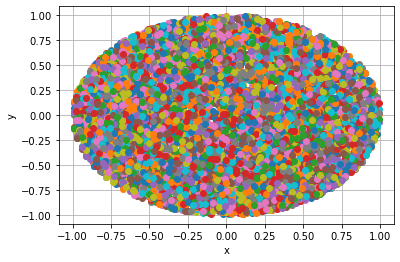

In [6]:
import matplotlib.pyplot as plt
import random
import numpy as np
def Ball2(x0,r,n):
    X=np.arange(-r,r,0.01)
    Y=np.arange(-r,r,0.01)
    for i in range(10000):
        X1=[random.choice(X),random.choice(Y)]
        if M2(x0,X1,n)<=r:
            x=X1[0]
            y=X1[1]
            plt.plot(x,y,"o")
            plt.xlabel('x')
            plt.ylabel('y')
            plt.grid()
x0=[0,0]                
Ball2(x0,1,2)

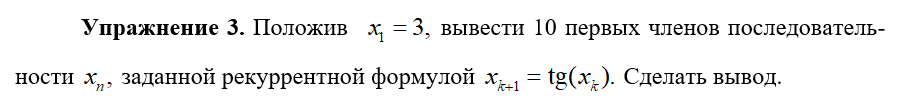

In [7]:
a=[3]
for i in range(10):
    a.append(np.tan(a[i]))
print(a)

[3, -0.1425465430742778, -0.14351994778492885, -0.14451354178374737, -0.14552803216462146, -0.14656416116305784, -0.14762270843290942, -0.14870449350594378, -0.14981037845185682, -0.15094127075832087, -0.15209812645289802]


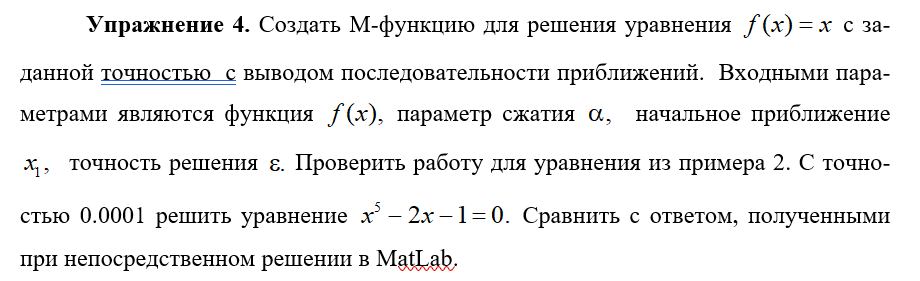

In [8]:
import numpy as np
#def f(x):
   # return x**5-2*x-1
def f(x):
    return (2*x+1)**(1/5)
#выражаем
def MM(a,x0,e):
    print("start")
    A=[]
    x1=f(x0)
    x2=f(x1)
    p=abs(x1-x2)
    n=1
    #n=(np.log(e*(1-a))-np.log(M2(round(x1),round(x2),1)))/np.log(a)
    while((a**n*abs(x1-x2))/(1-a))>e:
        n+=1
    print(n)
    
    for i in range(1,round(n)+1):
        print(i)
        A.append(x0)
        x0=f(x0)
        
    print("Ряд приближения")
    print(A)
    print("finish")
    return A
    

X=MM(0.3,3,0.0001)[6]
print(X**5-2*X-1)
#~=0

start
7
1
2
3
4
5
6
7
Ряд приближения
[3, 1.4757731615945522, 1.3162955573070174, 1.2943248914367889, 1.2911782909884895, 1.2907251205395418, 1.290659802900496]
finish
0.00013063527809142883


In [9]:
import numpy as np
def f(x):
    return np.arctan(x)+np.pi
def MM(a,x0,e):
    print("start")
    A=[]
    x1=f(x0)
    x2=f(x1)
    p=abs(x1-x2)
    n=1
    #n=(np.log(e*(1-a))-np.log(M2(round(x1),round(x2),1)))/np.log(a)
    while((a**n*abs(x1-x2))/(1-a))>e:
        n+=1
    #print(n)
    
    for i in range(1,round(n)+1):
        #print(i)
        A.append(x0)
        x0=f(x0)
        
    print("Ряд приближения")
    print(A)
    print("finish")
    return A
    

X=MM(0.3,3,0.0001)[6]
print(np.tan(X))
#~=0

start
Ряд приближения
[3, 4.3906384259880475, 4.4884516448912075, 4.4931752502709985, 4.493398404996493, 4.493408936315932, 4.493409433294847]
finish
4.493408936315925


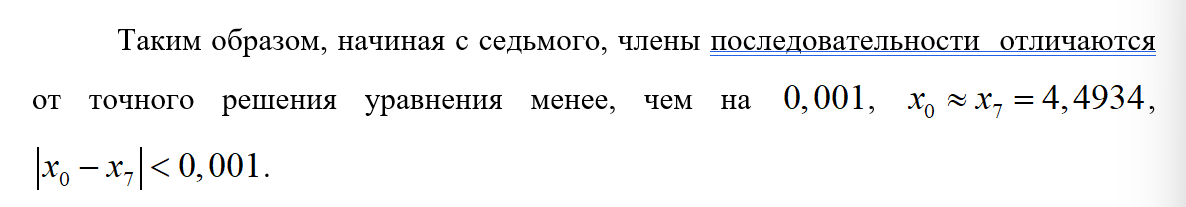

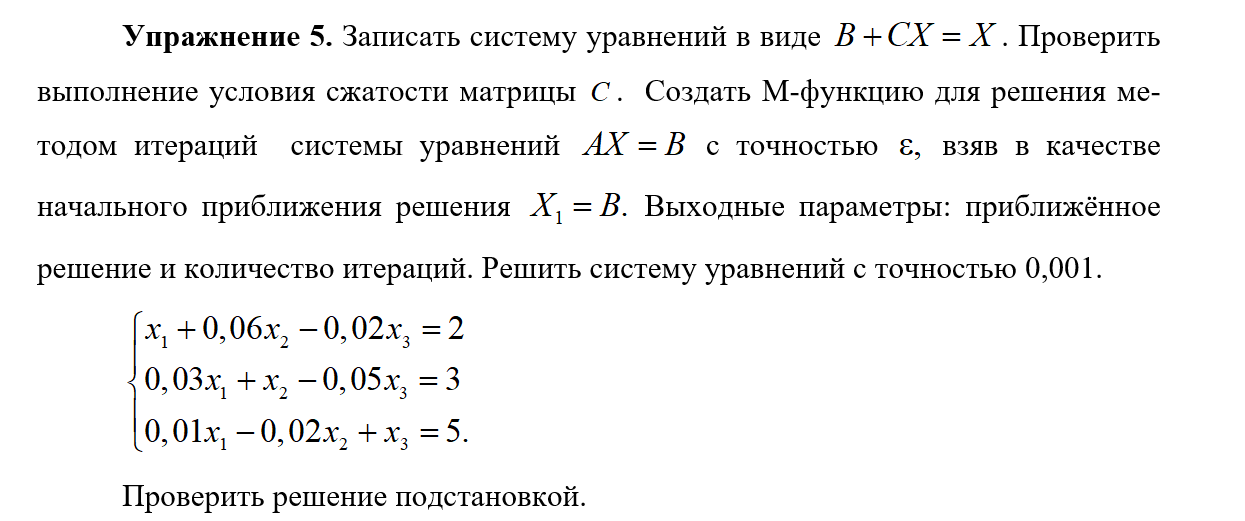

In [35]:
def M_matrix(func, x1, e=0.001):
    n = 0
    seq = [x1]
    while(True):
        x2 = func(x1)
        seq.append(x2)
        n += 1
        diff = x2 - x1
        if(all([diff[i] < e for i in range(3)])):
            break 
        x1 = x2 
    return (seq[-1], n)

def M_checker(C, n, m):
    s = 0
    for k in range(n):
        s_now = 0
        for j in range(m):
            s_now += abs(C[k,j])
        s = max(s_now, s)
    if s < 1:
        return False 
    s = 0
    for k in range(n):
        s_now = 0
        for j in range(m):
            s_now += abs(C[j,k])
        s = max(s_now, s)
    if s < 1:
        return False 

    s = 0
    for k in range(n):
        for j in range(m):
            s += C[k,j]**2
    
    if s**0.5 < 1:
        return False 
    return True 
A = np.matrix([[1, 0.06, -0.02], [0.03, 1, -0.05], [0.01, -0.02, 1]])
B = np.matrix([[2], [3], [5]])
E = np.matrix([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
C = -A + E
maxl=0
if M_checker(C,3,3):
        for i in range(3):
            maxl=A[i,0]
            for j in range(3):
                if abs(A[i,j])>maxl:
                    maxl=A[i,j]
            A[i]/=maxl
            B[i]/=maxl
        C=-A+E 
    
            
M_matrix(lambda x: B + C*x, B)



(matrix([[1.909228],
         [3.194948],
         [5.044794]]),
 3)

In [11]:
A * M_matrix(lambda x: B + C*x, B)[0]

matrix([[2.000029  ],
        [2.99998514],
        [4.99998732]])

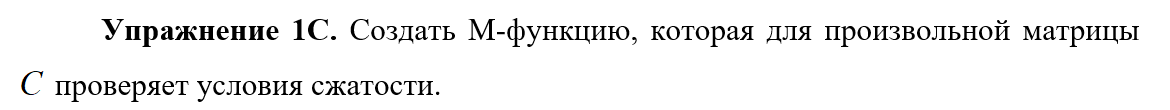

In [26]:
def M_checker(C, n, m):
    maxSumma=0
    for k in range(n):
        s=0
        for j in range(m):
            s += abs(C[k,j])
        if maxSumma<=s:
            maxSumma=s 
    if maxSumma < 1:
        return False 
    maxSumma=0
    for k in range(n):
        s=0
        for j in range(m):
            s += abs(C[j,k])
        if maxSumma<=s:
            maxSumma=s
    if maxSumma < 1:
        return False 

    s = 0
    for k in range(n):
        for j in range(m):
            s += C[k,j]**2
    
    if s**0.5 < 1:
        return False 
    return True 

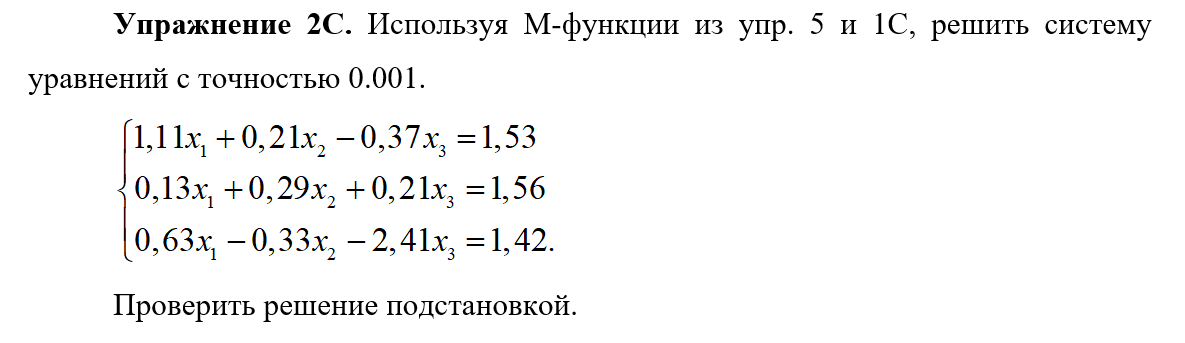

In [47]:
def M_matrix(func, x1, e=0.001):
    n = 0
    seq = [x1]
    while(True):
        x2 = func(x1)
        seq.append(x2)
        n += 1
        diff = x2 - x1
        if(all([diff[i] < e for i in range(3)])):
            break 
        x1 = x2 
    return (seq[-1], n)
A = np.matrix([[1.11, 0.21, -0.37], [0.13, 0.29, 0.21], [0.63, -0.33, -2.41]])
B = np.matrix([[1.53], [1.56], [1.42]])
E = np.matrix([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
C = -A + E

while True:
    if M_checker(C,3,3):
        for i in range(3):
            maxl=A[i,0]
            for j in range(3):
                if abs(A[i,j])>maxl:
                    maxl=A[i,j]
            A[i]/=maxl
            B[i]/=maxl
        C=-A+E 
    else:
        break 
M_matrix(lambda x: B + C*x, B)
 


(matrix([[ 0.16426714],
         [ 5.18808707],
         [-0.9654747 ]]),
 1)